**TAREA 3 - ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

**Realizado por:**

**LUIS CARLOS PIMIENTA HENAO**

**Grupo: 202016908_1**

**UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD**

**PROGRAMA DE INGENIERIA DE SISTEMAS**

**ANALISIS DE DATOS**

**BARRANQUILLA (ATLÁNTICO)**

**ABRIL 2024.**

**REGRESION LOGISTICA**

**1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.**

In [163]:
#Cargar Librerias.

import pandas as pd
import sklearn.metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Cargar libreria implementar modelos ciencia de datos.
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score,accuracy_score
from sklearn.linear_model import LogisticRegression #(Libreria Regresión Logistica)
from sklearn.metrics import classification_report, confusion_matrix

In [164]:
#Lectura datos Pyton y se cargan las variables

Datos = pd.read_csv('heart_cleveland_upload.csv')

In [165]:
Datos.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [166]:
Datos.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [167]:
#Descripción de los datos

Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

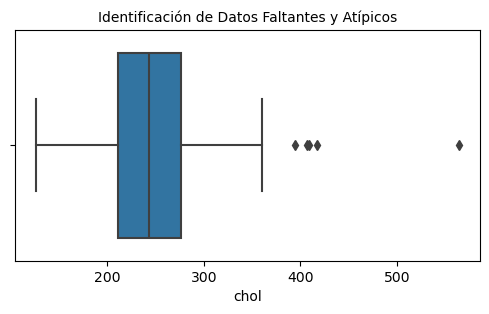

In [168]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol']) # chol = Colesterol
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

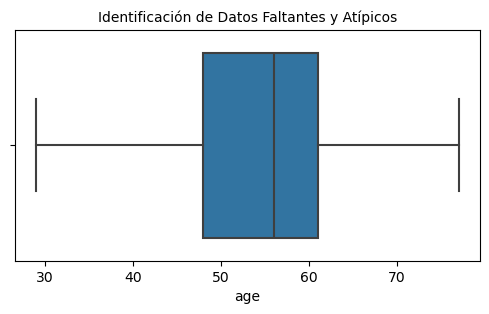

In [169]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['age']) # age = edad
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

**2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.**

In [170]:
print("Cantidad de Registros con cero en Edad: ", Datos['age'].isin([0]).sum())
print("Cantidad de Registros con cero en Sexo: ", Datos['sex'].isin([0]).sum())
print("Cantidad de Registros con cero en Dolor Toraxico: ", Datos['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en Presión Arterial: ", Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en Colesterol: ", Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en Azucar: ", Datos['fbs'].isin([0]).sum())
print("Cantidad de Registros con cero en Resultado Electrocardiografico: ", Datos['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia Cardiaca: ", Datos['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia Angina Inducida: ", Datos['exang'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia Depresion ST: ", Datos['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia Pendiente: ", Datos['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en Numero de vasos: ", Datos['ca'].isin([0]).sum())
print("Cantidad de Registros con cero en Tal: ", Datos['thal'].isin([0]).sum())
print("Cantidad de Registros con cero en Condición: ", Datos['condition'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Sexo:  96
Cantidad de Registros con cero en Dolor Toraxico:  23
Cantidad de Registros con cero en Presión Arterial:  0
Cantidad de Registros con cero en Colesterol:  0
Cantidad de Registros con cero en Azucar:  254
Cantidad de Registros con cero en Resultado Electrocardiografico:  147
Cantidad de Registros con cero en Frecuencia Cardiaca:  0
Cantidad de Registros con cero en Frecuencia Angina Inducida:  200
Cantidad de Registros con cero en Frecuencia Depresion ST:  96
Cantidad de Registros con cero en Frecuencia Pendiente:  139
Cantidad de Registros con cero en Numero de vasos:  174
Cantidad de Registros con cero en Tal:  164
Cantidad de Registros con cero en Condición:  160


In [171]:
Datos ['sex']=Datos['sex'].replace(0,Datos['sex'].mean())
Datos ['cp']=Datos['cp'].replace(0,Datos['cp'].mean())
Datos ['fbs']=Datos['fbs'].replace(0,Datos['fbs'].mean())
Datos ['restecg']=Datos['restecg'].replace(0,Datos['restecg'].mean())
Datos ['exang']=Datos['exang'].replace(0,Datos['exang'].mean())
Datos ['oldpeak']=Datos['oldpeak'].replace(0,Datos['oldpeak'].mean())
Datos ['slope']=Datos['slope'].replace(0,Datos['slope'].mean())
Datos ['ca']=Datos['ca'].replace(0,Datos['ca'].mean())
Datos ['thal']=Datos['thal'].replace(0,Datos['thal'].mean())
Datos ['condition']=Datos['condition'].replace(0,Datos['condition'].mean())

In [172]:
print("Cantidad de Registros con cero en Edad: ", Datos['age'].isin([0]).sum())
print("Cantidad de Registros con cero en Sexo: ", Datos['sex'].isin([0]).sum())
print("Cantidad de Registros con cero en Dolor Toraxico: ", Datos['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en Presión Arterial: ", Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en Colesterol: ", Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en Azucar: ", Datos['fbs'].isin([0]).sum())
print("Cantidad de Registros con cero en Resultado Electrocardiografico: ", Datos['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia Cardiaca: ", Datos['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia Angina Inducida: ", Datos['exang'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia Depresion ST: ", Datos['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia Pendiente: ", Datos['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en Numero de vasos: ", Datos['ca'].isin([0]).sum())
print("Cantidad de Registros con cero en Tal: ", Datos['thal'].isin([0]).sum())
print("Cantidad de Registros con cero en Condición: ", Datos['condition'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Sexo:  0
Cantidad de Registros con cero en Dolor Toraxico:  0
Cantidad de Registros con cero en Presión Arterial:  0
Cantidad de Registros con cero en Colesterol:  0
Cantidad de Registros con cero en Azucar:  0
Cantidad de Registros con cero en Resultado Electrocardiografico:  0
Cantidad de Registros con cero en Frecuencia Cardiaca:  0
Cantidad de Registros con cero en Frecuencia Angina Inducida:  0
Cantidad de Registros con cero en Frecuencia Depresion ST:  0
Cantidad de Registros con cero en Frecuencia Pendiente:  0
Cantidad de Registros con cero en Numero de vasos:  0
Cantidad de Registros con cero en Tal:  0
Cantidad de Registros con cero en Condición:  0


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

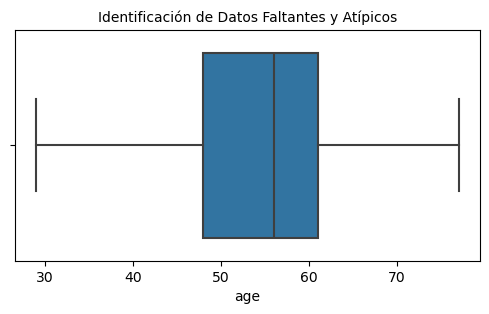

In [173]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

In [174]:
#Conteo Datos Atípicos

# Niveles de azucar muy bajos o muy altos, fuera de los rangos normales, atipicos ><

azucar_baja=70
azucar_alta=240
Total_Atipicos=((Datos['fbs']<azucar_baja)|(Datos['fbs']>azucar_alta)).sum()
print("El total de datos atipicos es: {}".format(Total_Atipicos))

El total de datos atipicos es: 297


In [175]:
#Datos=Datos[(Datos['fbs']<azucar_alta)&(Datos['fbs']>azucar_baja)]

In [176]:
#Total_Atipicos=((Datos['fbs']<azucar_baja)|(Datos['fbs']>azucar_alta)).sum()
#print("El total de datos atipicos es: {}".format(Total_Atipicos))

In [177]:
#Revision tipo de datos

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    float64
 2   cp         297 non-null    float64
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    float64
 6   restecg    297 non-null    float64
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    float64
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    float64
 11  ca         297 non-null    float64
 12  thal       297 non-null    float64
 13  condition  297 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 32.6 KB


In [178]:
# Se convierten datos float y otros en int

Datos['age'] = Datos['age'].astype(int)
Datos['sex'] = Datos['sex'].astype(int)
Datos['cp'] = Datos['cp'].astype(int)
Datos['trestbps'] = Datos['trestbps'].astype(int)
Datos['chol'] = Datos['chol'].astype(int)
Datos['fbs'] = Datos['fbs'].astype(int)
Datos['restecg'] = Datos['restecg'].astype(int)
Datos['thalach'] = Datos['thalach'].astype(int)
Datos['exang'] = Datos['exang'].astype(int)
Datos['oldpeak'] = Datos['oldpeak'].astype(int)
Datos['slope'] = Datos['slope'].astype(int)
Datos['ca'] = Datos['ca'].astype(int)
Datos['thal'] = Datos['thal'].astype(int)
Datos['condition'] = Datos['condition'].astype(int)

In [179]:
#Revision tipo de datos

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        297 non-null    int32
 1   sex        297 non-null    int32
 2   cp         297 non-null    int32
 3   trestbps   297 non-null    int32
 4   chol       297 non-null    int32
 5   fbs        297 non-null    int32
 6   restecg    297 non-null    int32
 7   thalach    297 non-null    int32
 8   exang      297 non-null    int32
 9   oldpeak    297 non-null    int32
 10  slope      297 non-null    int32
 11  ca         297 non-null    int32
 12  thal       297 non-null    int32
 13  condition  297 non-null    int32
dtypes: int32(14)
memory usage: 16.4 KB


**3.	Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.**

In [180]:
# Personas con enfermedades. 0 = No tiene enfermedades / 1 = Tiene enfermedades.

Datos[['condition']].value_counts()

condition
0            160
1            137
Name: count, dtype: int64

In [181]:
# Personas con la azucar alta

Datos[['fbs']].value_counts()

fbs
0      254
1       43
Name: count, dtype: int64

In [182]:
Datos['age'].value_counts()

age
58    18
57    17
54    16
59    14
60    12
51    12
56    11
52    11
44    11
62    11
64    10
41    10
63     9
67     9
61     8
55     8
45     8
42     8
65     8
46     7
48     7
50     7
43     7
66     7
53     7
49     5
47     5
70     4
68     4
39     4
35     4
69     3
71     3
40     3
34     2
37     2
76     1
29     1
74     1
38     1
77     1
Name: count, dtype: int64

In [183]:
Datos[['condition','fbs','age']].head(10)

,condition,fbs,age
0,0,1,69
1,0,0,69
2,0,0,66
3,1,1,65
4,0,0,64
5,0,0,64
6,0,1,63
7,1,0,61
8,0,0,60
9,0,0,59


**4.	Dividir el dataset en Train y Test para evaluar correctamente el modelo.**

In [184]:
# Personas que estan enfermas 1 y no enfermas 0

X = Datos.drop('condition',axis=1)
Y = Datos['condition']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.25, stratify= Y, random_state= 0)

In [185]:
print(X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
234   56    0   3       200   288    1        2      133      1        4   
82    66    0   2       146   278    0        2      152      0        1   
36    56    1   1       120   240    0        0      169      0        1   
237   56    1   3       132   184    0        2      105      1        2   
133   47    1   2       108   243    0        0      152      0        1   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
291   40    1   3       110   167    0        2      114      1        2   
195   61    0   3       130   330    0        2      169      0        1   
170   65    0   3       150   225    0        2      114      0        1   
135   46    0   2       142   177    0        2      160      1        1   
293   39    1   3       118   219    0        0      140      0        1   

     slope  ca  thal  
234      2   2     2  
82       1   1     0  
36       2   0    

In [186]:
print(Y_train)

234    1
82     0
36     0
237    1
133    1
      ..
291    1
195    1
170    1
135    0
293    1
Name: condition, Length: 222, dtype: int32


**--------------------------**

**5.	Entrenar el modelo configurando los diferentes hiperparámetros.**

In [187]:
from sklearn.linear_model import LogisticRegression

In [213]:
#Se crean los modelos de Entrenamiento y Prueba (Train y test)

modelo_regresion = LogisticRegression()
modelo_regresion.fit=(X_train, Y_train)
Prediccion = modelo_regresion.predict=(X_test)

In [206]:
print (Y_test)

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condition, Length: 75, dtype: int32


In [216]:
Prediccion

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
185,62,0,3,140,268,0,2,160,0,3,2,2,0
157,70,1,3,145,174,0,0,125,1,2,2,0,2
110,54,0,2,135,304,1,0,170,0,1,0,0,0
39,56,1,1,130,221,0,2,163,0,1,0,0,2
198,60,1,3,130,206,0,2,132,1,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,45,1,3,115,260,0,2,185,0,1,0,0,0
163,67,1,3,100,299,0,2,125,1,0,1,2,0
137,44,0,2,108,141,0,0,175,0,0,1,0,0
33,57,0,1,130,236,0,2,174,0,1,1,1,0


**6.	Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.**

In [215]:
#Desempeño del modelo de regresón.

from sklearn.metrics import classification_report
print(classification_report(Y, Y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       137

    accuracy                           1.00       297
   macro avg       1.00      1.00      1.00       297
weighted avg       1.00      1.00      1.00       297



**---------------------------------------------------**

**7.	Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.**

In [209]:
Datos.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,2,160,234,1,2,131,0,0,1,1,0,0
1,69,0,2,140,239,0,0,151,0,1,0,2,0,0
2,66,0,2,150,226,0,0,114,0,2,2,0,0,0
3,65,1,2,138,282,1,2,174,0,1,1,1,0,1
4,64,1,2,110,211,0,2,144,1,1,1,0,0,0


In [210]:
Y = Datos[['age','sex','chol','fbs','thalach']]
Y = Datos['condition']

In [211]:
confusion_matrix(Y,Y)

array([[160,   0],
       [  0, 137]], dtype=int64)

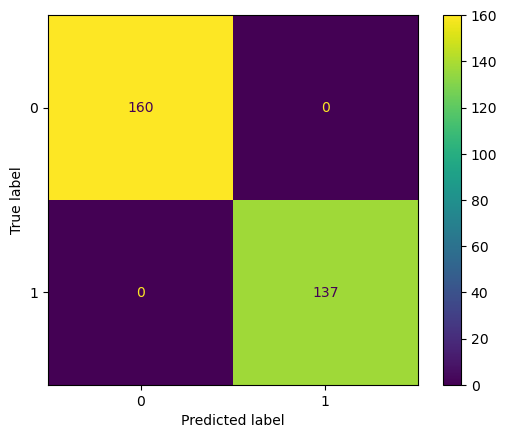

In [212]:
cm = confusion_matrix(Y, Y)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

1. El algoritmo indica que 160 personas no van a estar enfermas.

2. El algoritmo predijo indica que 137 personas van a estar enfermas.

3. El algoritmo no predijo errores, el cual, dio un valor de 0 (cero)